In [0]:
if (!require('ggplot2')) install.packages('ggplot2'); library('ggplot2')
if (!require('igraph')) install.packages('igraph'); library('igraph')
if (!require('R.utils')) install.packages('R.utils'); library('R.utils')

In [0]:
temp <- tempfile()
download.file('http://snap.stanford.edu/data/facebook_combined.txt.gz',temp)
G <- read_graph(gunzip(temp, "facebook_combined.txt"), format='edgelist',directed = F)

# Question 1

In [0]:
N_edges <- gsize(G)
N_nodes <- gorder(G)
cat(paste ("The number of nodes:", N_nodes, '\n'))
cat(paste ("The number of edges:", N_edges, '\n'))

connectivity <- is_connected(G)
if (connectivity){
  cat ('The Facebook network is connected \n')
} else{
  cat ('The Facebook network is unconnected \n')
}


The number of nodes: 4039 
The number of edges: 88234 
The Facebook network is connected 


# Question 2

In [0]:
D <- diameter(G, unconnected = !connectivity)
cat (paste("The diameter of the graph or GCC is", D, "\n"))

The diameter of the graph or GCC is 8 


# Question 3,4

In [0]:
log_log_plot<- function(title, df)
{
  colnames(df)=c('d','p')
  df <- df[df$p!=0,]
  LR <- lm(log(p)~log(d), df)
  tempp <- ggplot(df,aes(x=log(d),y=log(p)))
  dplot <- tempp+geom_smooth(method="lm")+geom_point()
  dplot <- dplot + labs(title=title)+ theme(plot.title = element_text(hjust = 0.5,size =14))
  dplot <- dplot + annotate("text",x=Inf,y=-Inf, hjust = 5, vjust=-2, label =paste('Slope =',format(coef(LR)[2],digits=4)))
  return (dplot)
}

degree_plot<- function(title, df)
{
  colnames(df)<-c('d','p')
  tempp <- ggplot(df,aes(d,p))
  deplot <- tempp + geom_point()+ labs(title=title)+ theme(plot.title = element_text(hjust = 0.5,size =14))
  return (deplot)
}

`geom_smooth()` using formula 'y ~ x'



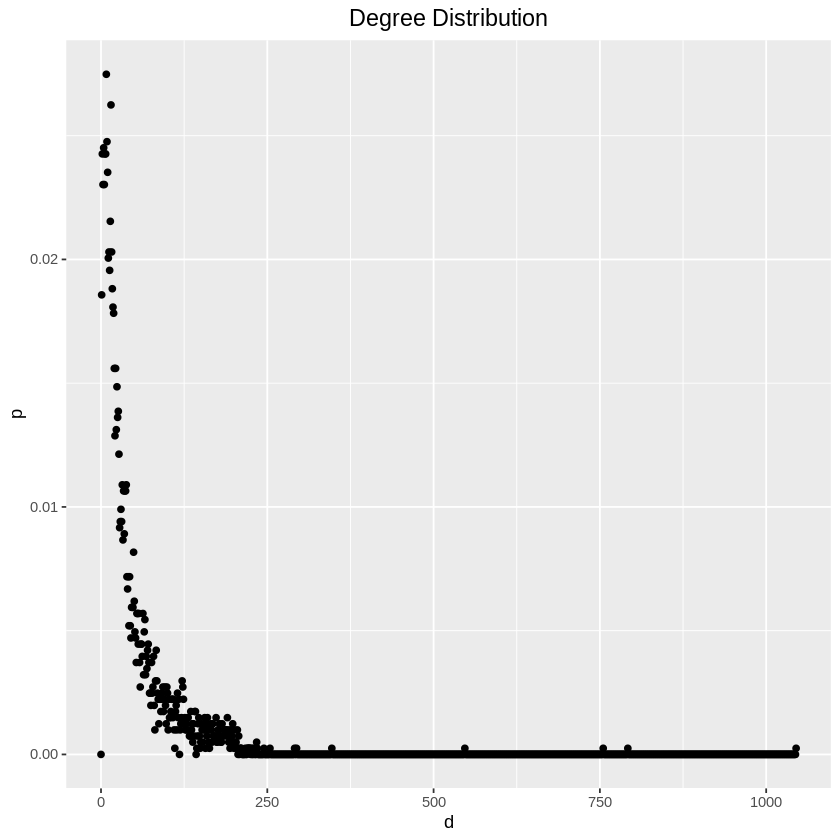

The mean degree of the network is 43.6910126268878 


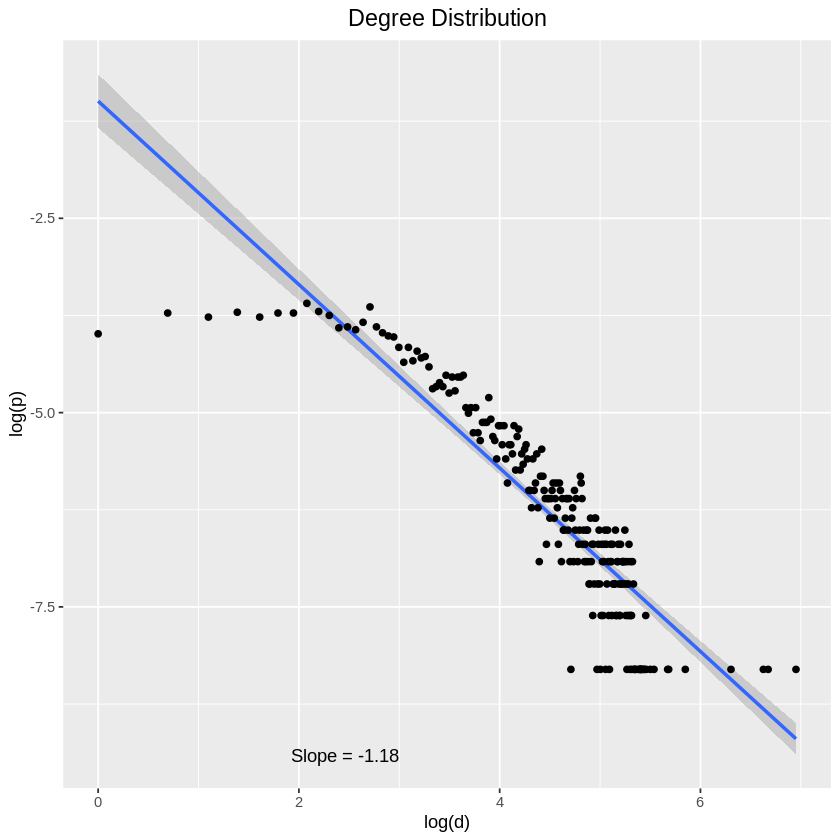

In [0]:
dis <- degree_distribution(G)
df <- data.frame(0:(length(dis)-1), dis)
colnames(df)<-c('d','p')
degree_lists <- df$d * df$p
mean_degree <- sum(degree_lists)
p <- degree_plot('Degree Distribution', df)
p_log<-log_log_plot('Degree Distribution', df)
print (p)
print (p_log)
cat (paste ('The mean degree of the network is', mean_degree,"\n"))

# Question 5, 6

In [0]:
plot_personalized_network<- function(g)
{
  
  # vertex setting
  vertex_attr(g) <- list(color = c('black',rep("skyblue", gorder(g)-1)), size = c(6,rep(3, gorder(g)-1)))

  # visualization setting
  l <- layout_with_kk(g)
  l <- norm_coords(l, ymin=-0.5, ymax=0.5, xmin=-1, xmax=1)
  
  plot(g, rescale=FALSE, layout = l, vertex.color=V(g)$color, vertex.size=V(g)$size, vertex.label=NA)
}

The number of nodes in subgraph is 348 
The number of edges in subgraph is 2866 
The diameter of the personalized network is 2 


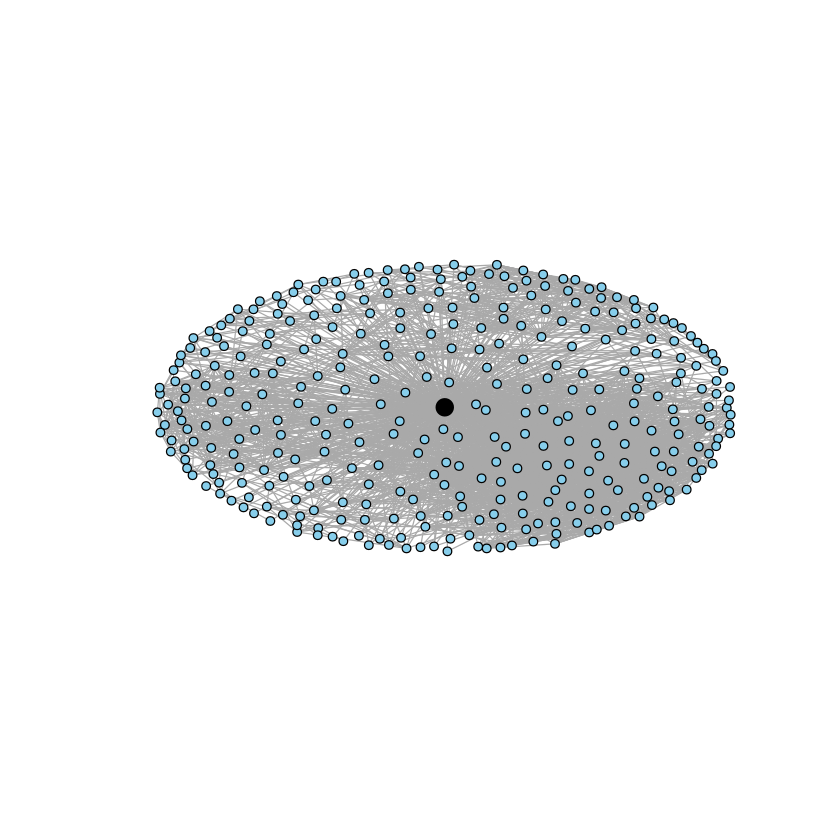

In [0]:
pN_list <-make_ego_graph(G, order =1, nodes = V(G)[1])
subG <- pN_list[[1]]
cat (paste('The number of nodes in subgraph is', gorder(subG), '\n'))
cat (paste('The number of edges in subgraph is',gsize(subG), '\n'))
cat (paste ('The diameter of the personalized network is', diameter(subG),'\n'))
plot_personalized_network(subG)

# Question 8

In [0]:
N_coreNode <- 0
sum_degree <-0
for (v in 1: gorder(G))
{
  if (degree(G, v)>200)
  {
    N_coreNode <- N_coreNode+1
    sum_degree <- sum_degree + degree(G, v)
  }
}
print (N_coreNode)
print (sum_degree/N_coreNode)

[1] 40
[1] 279.375


# Question 9

In [0]:
plot_clusters_result <- function(g, cluster_method_list,cluster_method_name)
{  
  #visualization setting
  l <- layout_with_fr(g)
  l <- norm_coords(l, ymin=-1/3, ymax=1/3, xmin=-1, xmax=1)
  
  len <- length(cluster_method_list)
  par(mfrow=c(len,1))
  for (i in 1:len)
  {
    # setting community color
    Fun <- match.fun(cluster_method_list[[i]])
    comm <- Fun(g)
    M <- modularity(comm)
    cat(paste('The Modularity for', cluster_method_name[[i]], 'is', M,"\n"))
    comps <-comm$membership
    colbar <-rainbow(max(comps)+1)
    V(g)$color <- colbar[comps+1]  
    # plotting  
    p<-plot(g, rescale=FALSE, layout = l, vertex.color=V(g)$color, vertex.size=6, vertex.label=NA, main=cluster_method_name[[i]])
  }
}

Node 1 :
The Modularity for Fast_Greedy is 0.413101372834235 
The Modularity for Edge_Betweenness is 0.353302172546335 
The Modularity for Infomap is 0.389118471050977 
Node 108 :
The Modularity for Fast_Greedy is 0.435929376026475 
The Modularity for Edge_Betweenness is 0.506754916538902 
The Modularity for Infomap is 0.508223340384871 


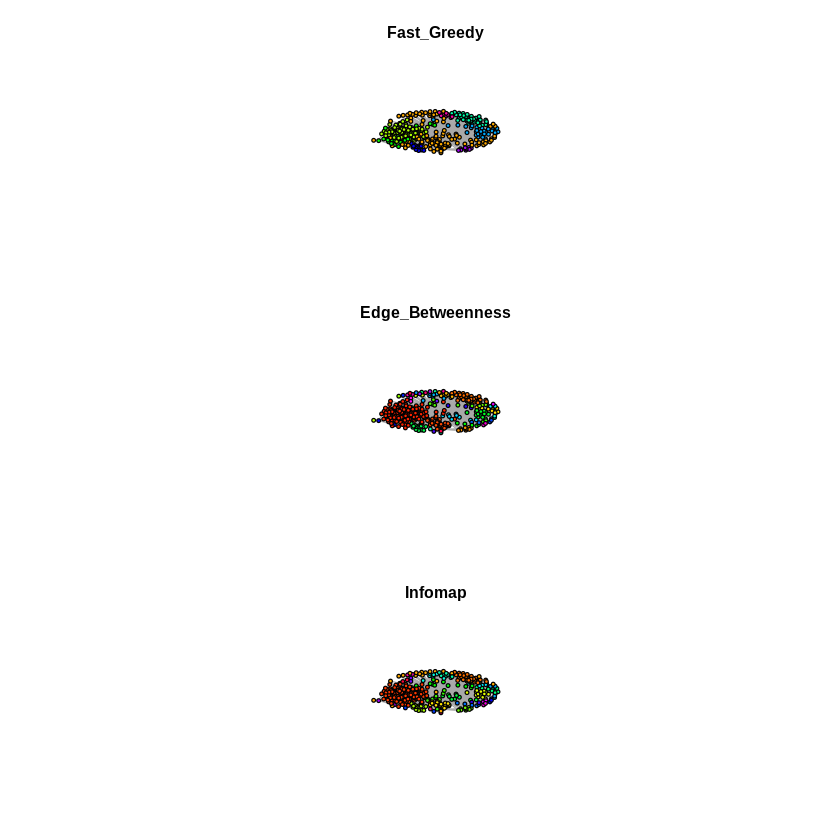

Node 349 :
The Modularity for Fast_Greedy is 0.251714858543331 
The Modularity for Edge_Betweenness is 0.133528021370078 
The Modularity for Infomap is 0.0954641960913581 


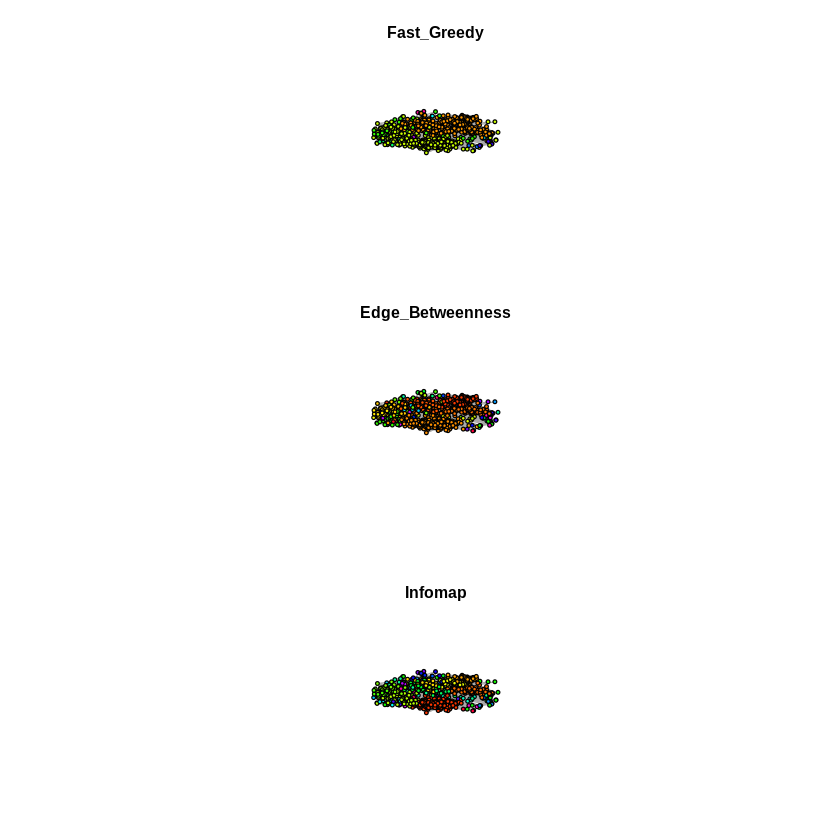

Node 484 :
The Modularity for Fast_Greedy is 0.507001642196514 
The Modularity for Edge_Betweenness is 0.489095180244803 
The Modularity for Infomap is 0.515278752174842 


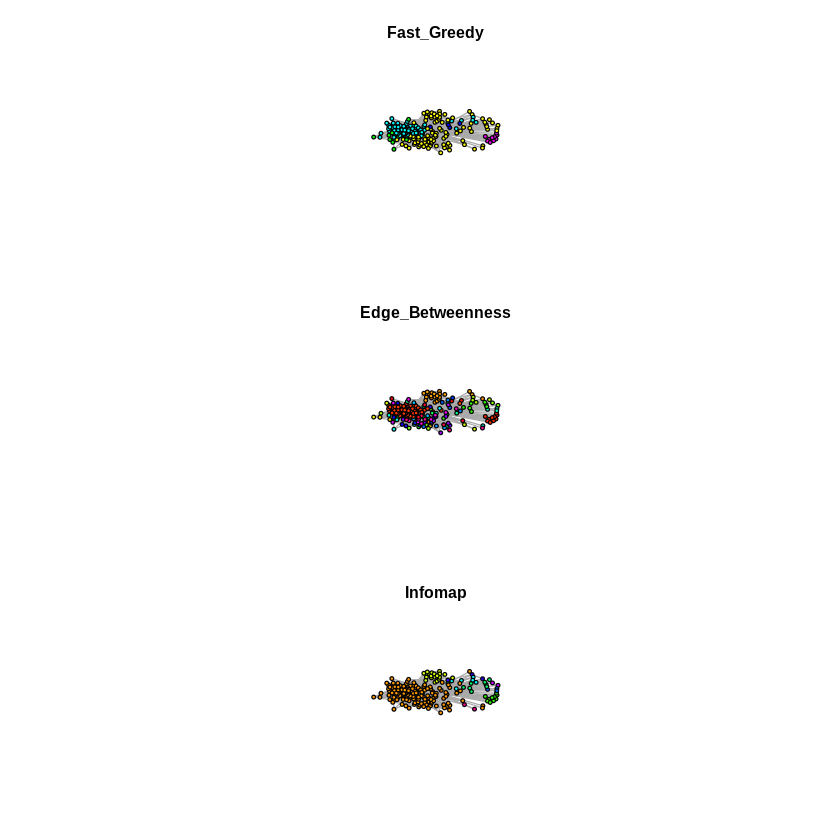

Node 1087 :
The Modularity for Fast_Greedy is 0.145531499565493 
The Modularity for Edge_Betweenness is 0.027623772388464 
The Modularity for Infomap is 0.0269066172233357 


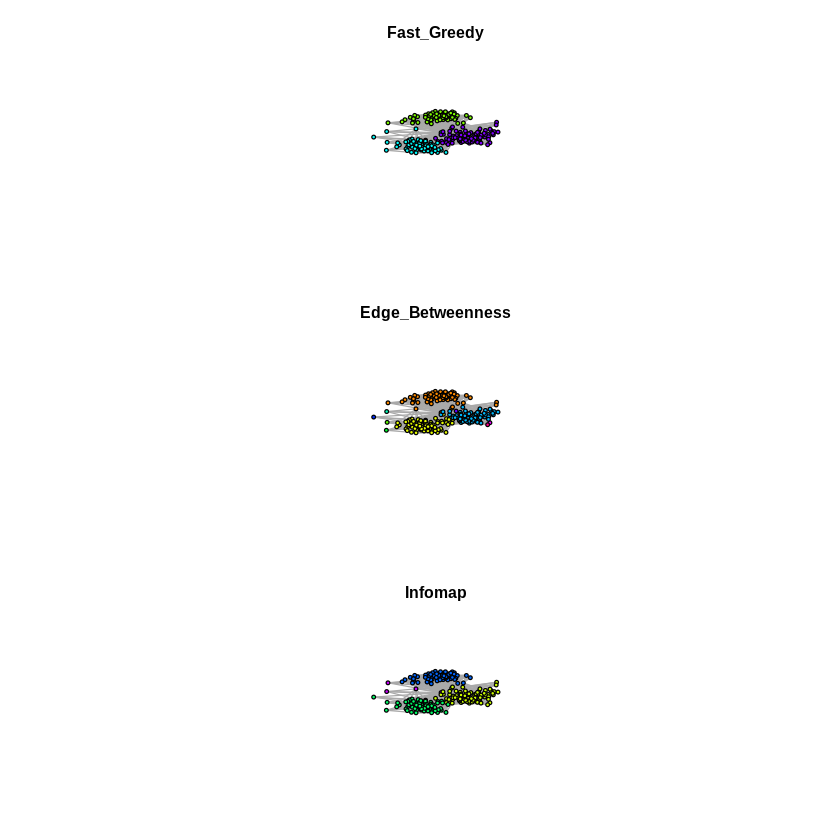

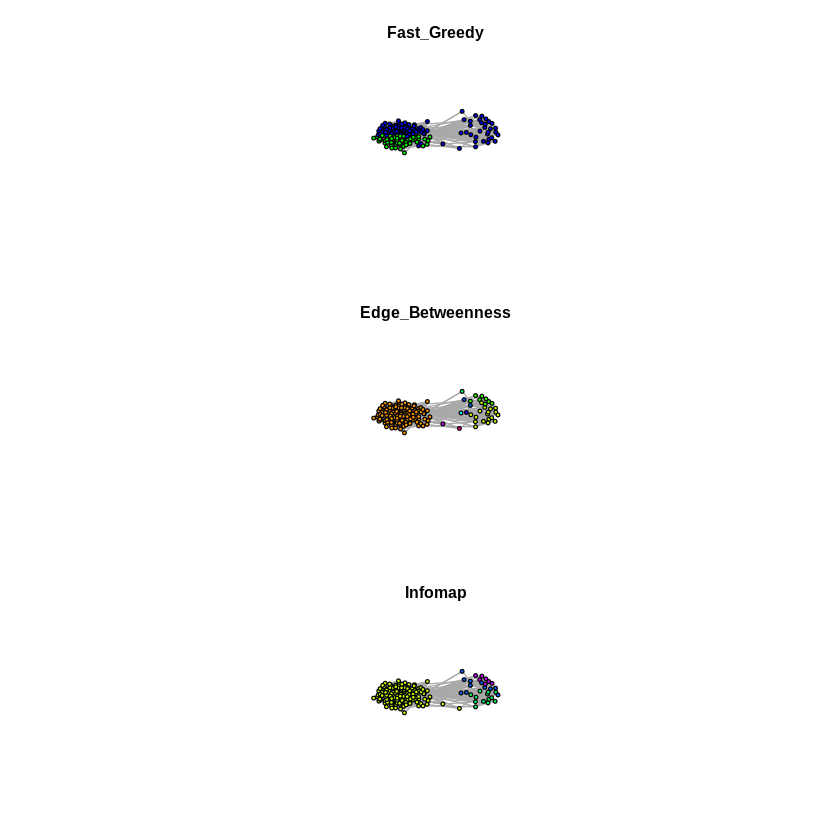

In [0]:
core_node_list <-c(1,108,349,484,1087)
cluster_method_list <-list(f1=cluster_fast_greedy, f2=cluster_edge_betweenness, f3=cluster_infomap)
cluster_method_name <-list ('Fast_Greedy','Edge_Betweenness','Infomap')
pN_list <- make_ego_graph(G, order=1,nodes = core_node_list)

i <-1
for (subG in pN_list)
{
  cat(paste('Node',core_node_list[i],":\n"))
  plot_clusters_result(subG,cluster_method_list, cluster_method_name)
  i<-i+1
}

# Question 10

Node 1 with modification:
The Modularity for Fast_Greedy is 0.44185326886839 
The Modularity for Edge_Betweenness is 0.41614614203983 
The Modularity for Infomap is 0.418007659453891 
Node 108 with modification:
The Modularity for Fast_Greedy is 0.435951452830244 
The Modularity for Edge_Betweenness is 0.505636085826648 
The Modularity for Infomap is 0.508193951070109 


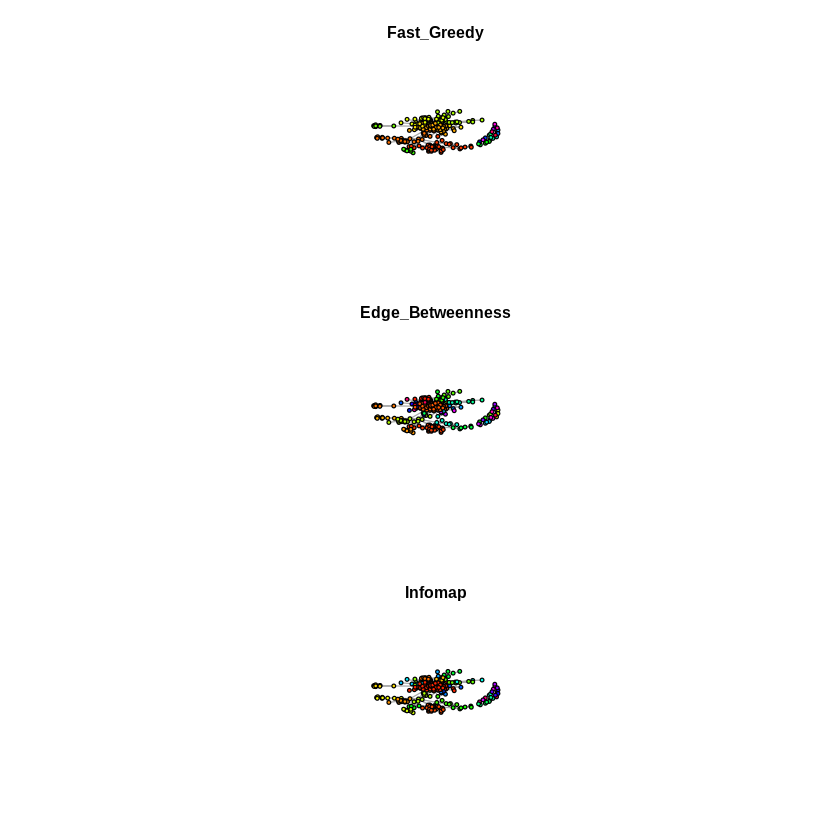

Node 349 with modification:
The Modularity for Fast_Greedy is 0.257489035990867 
The Modularity for Edge_Betweenness is 0.133729547584523 
The Modularity for Infomap is 0.0950953566372688 


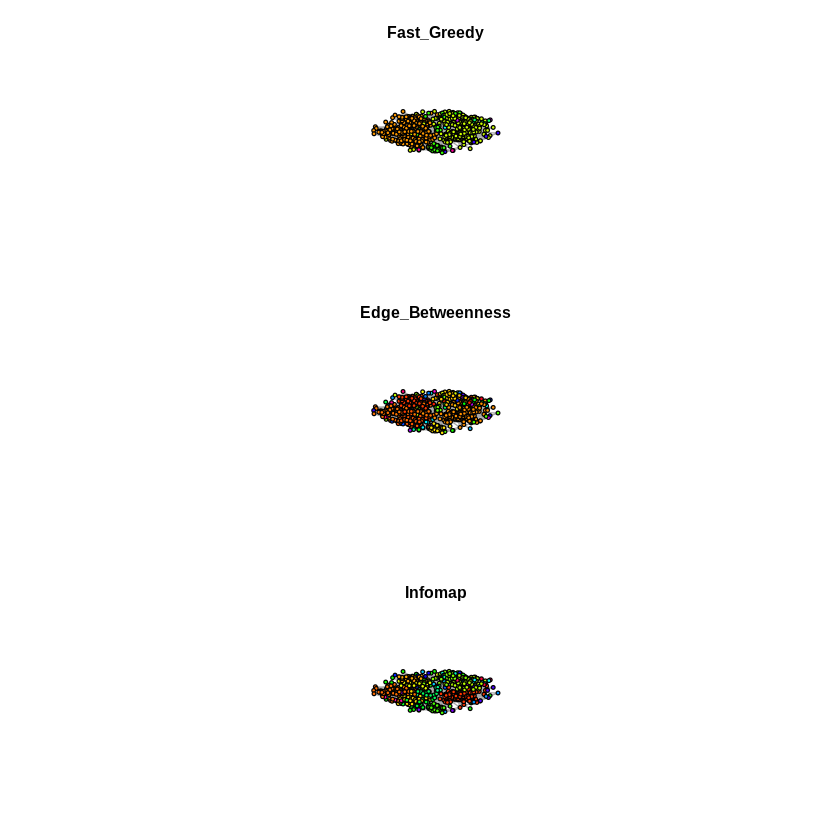

Node 484 with modification:
The Modularity for Fast_Greedy is 0.521130793731563 
The Modularity for Edge_Betweenness is 0.49561711345795 
The Modularity for Infomap is 0.529147521051314 


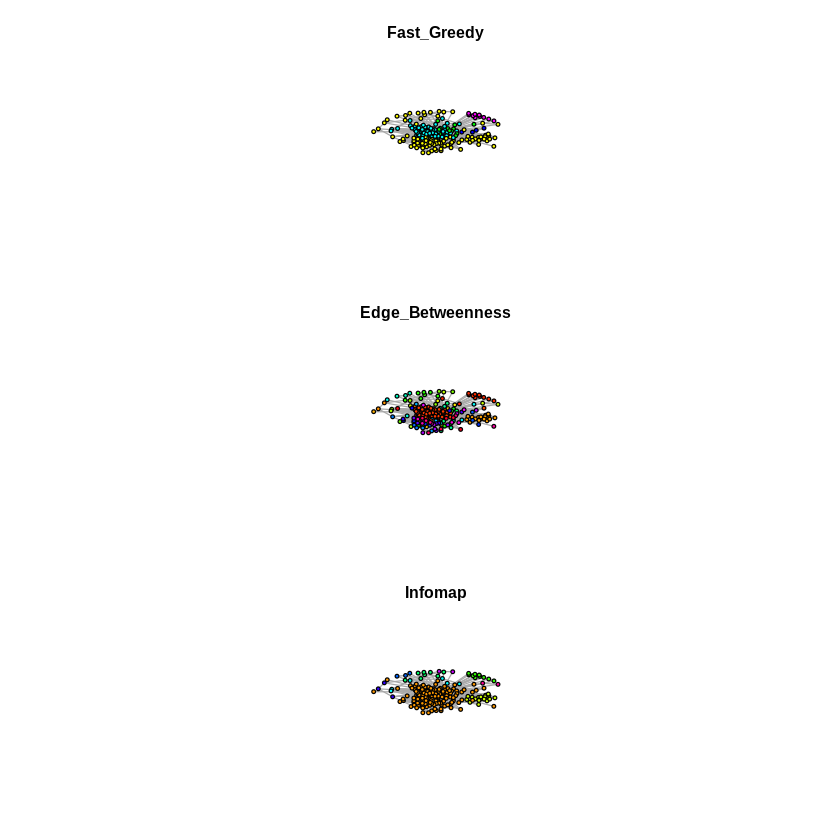

Node 1087 with modification:
The Modularity for Fast_Greedy is 0.148195631953499 
The Modularity for Edge_Betweenness is 0.0324952980499142 
The Modularity for Infomap is 0.0273715944871148 


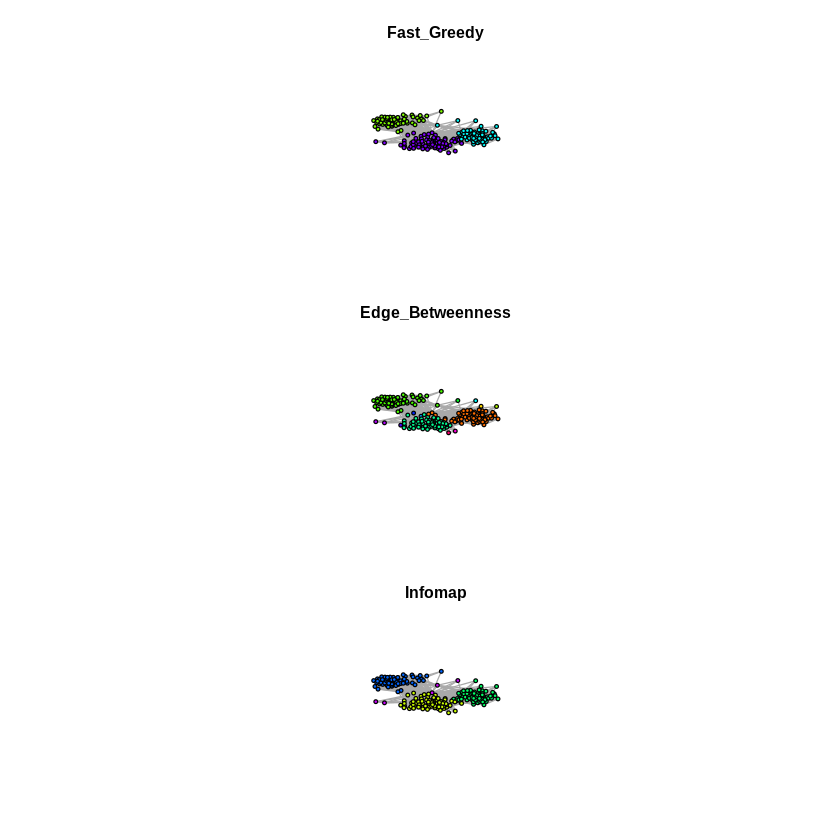

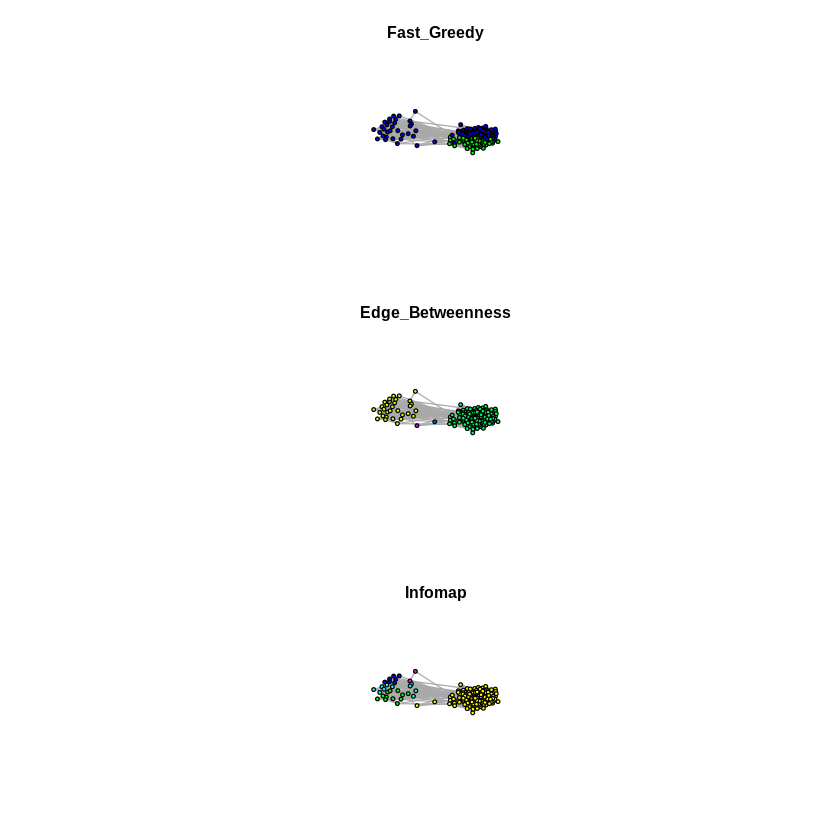

In [0]:
i <-1
for (subG in pN_list)
{
  cat(paste('Node',core_node_list[i],"with modification:\n"))
  modified_G <- delete.vertices(subG, 1)
  plot_clusters_result(modified_G,cluster_method_list, cluster_method_name)
  i<-i+1
}

# Question 12

Embeddedness of a node is defined as the number of mutual friends a node shares with the core node.

Dispersion of a node is defined as the sum of distances between every pair of the mutual friends the node shares with the core node. The distances should be calculated in a modified graph where the node (whose dispersion is being computed) and the core node are removed.

In [0]:
if (!require('Matrix')) install.packages('Matrix'); library('Matrix')

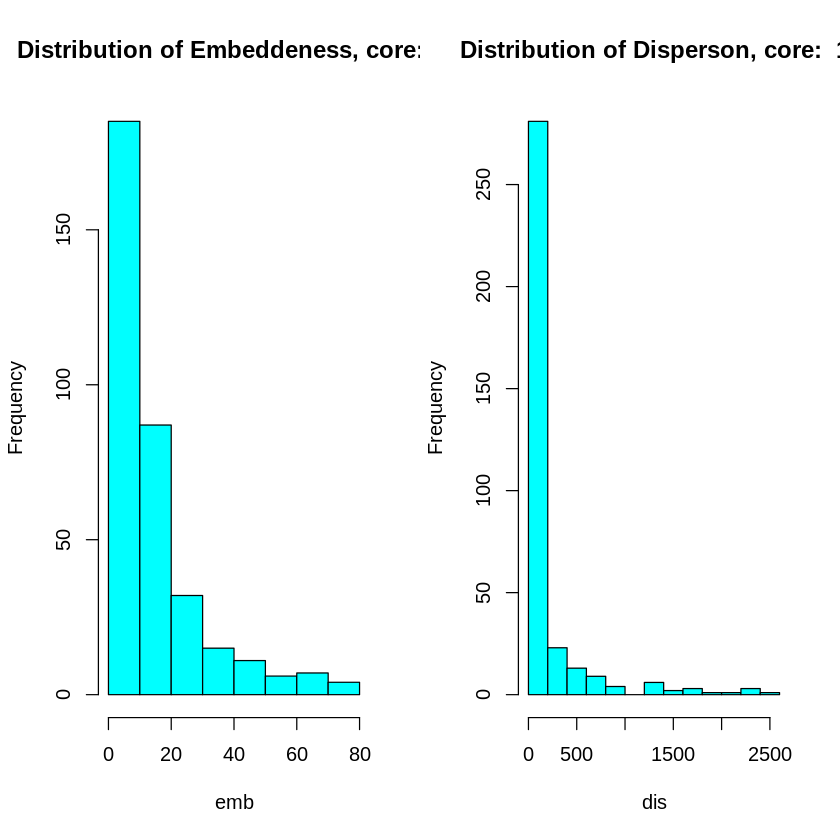

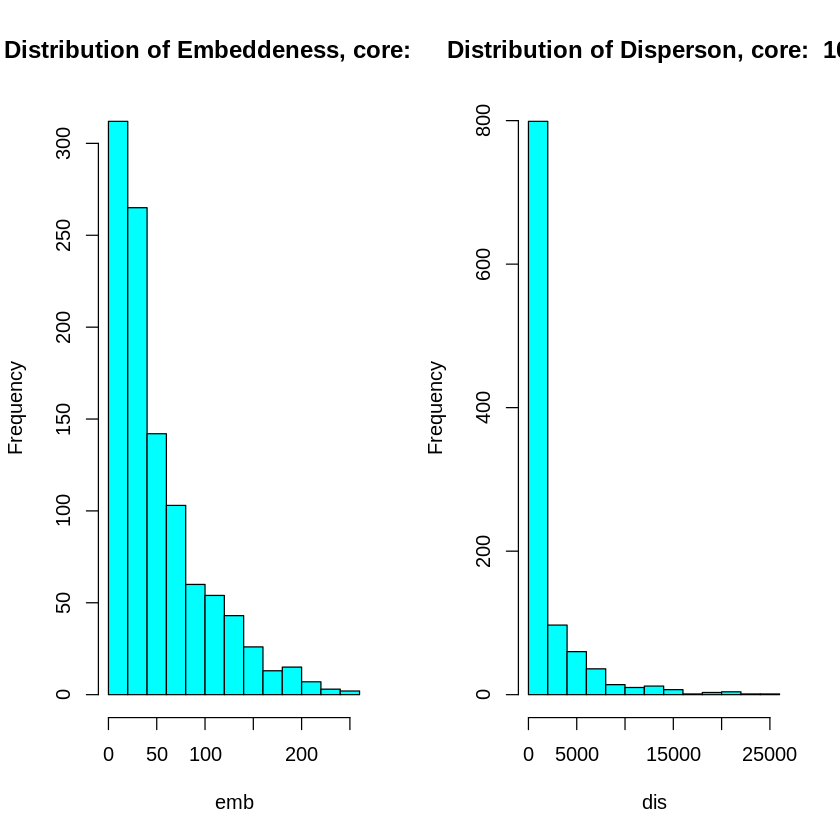

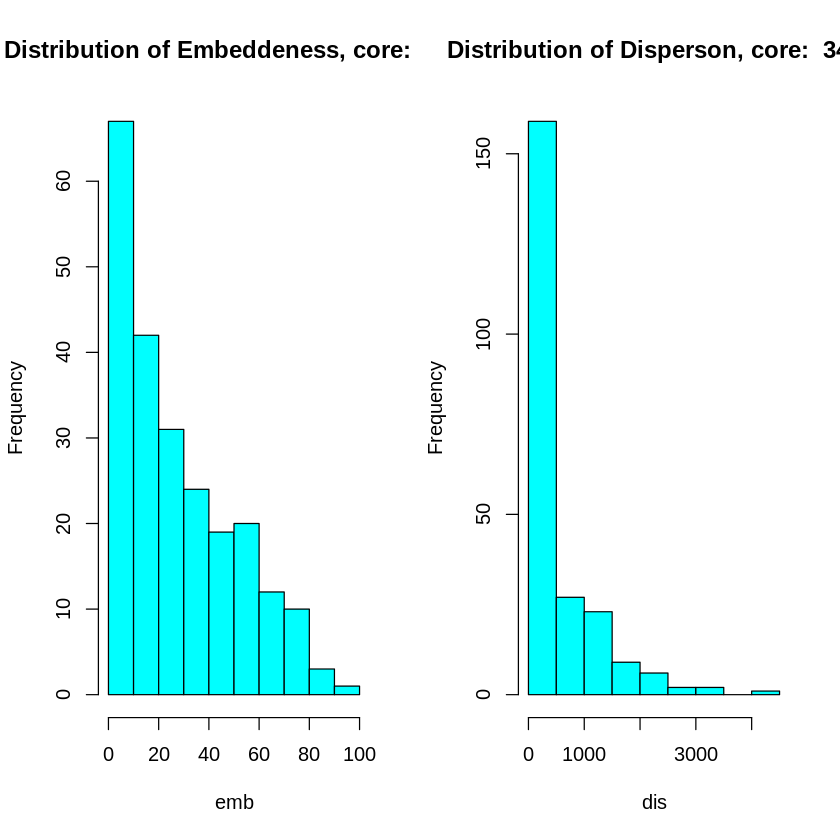

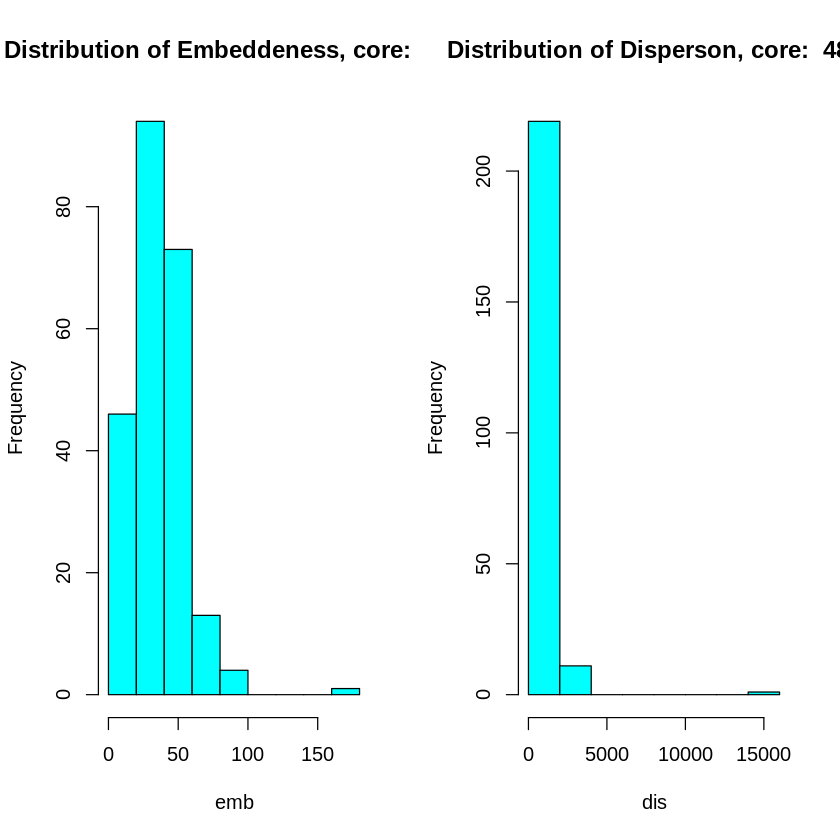

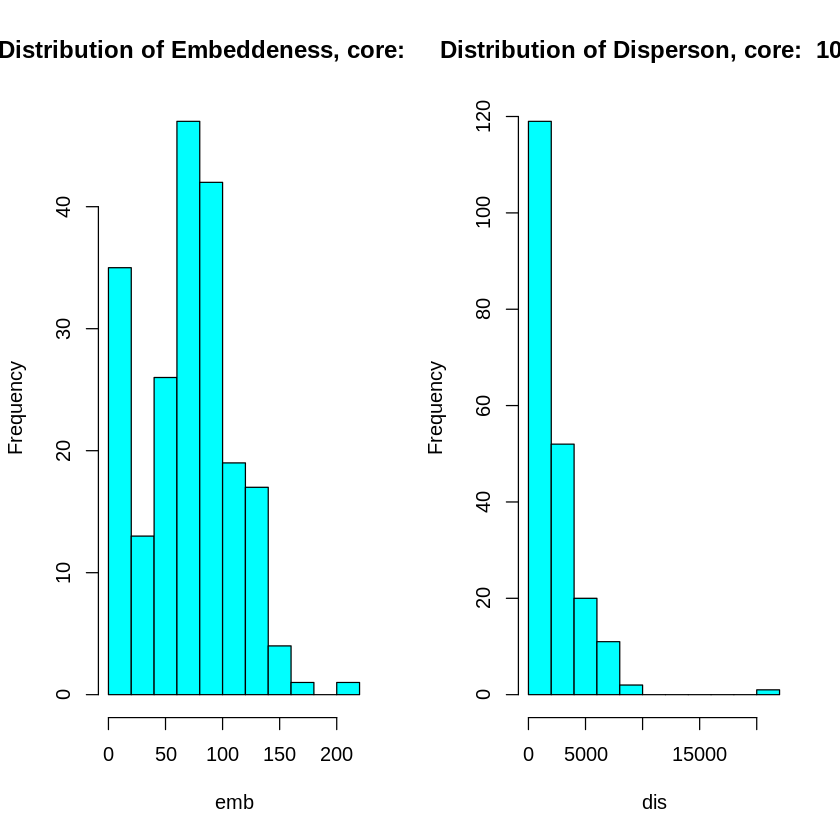

In [0]:
core_node_list <- c(1,108,349,484,1087)

dispersion <- function(network, core, node){
    node_n <- neighbors(network, node)
    core_n <- neighbors(network, core)
    mutual <- intersect(core_n, node_n)
    sub <- induced_subgraph(network, mutual)
    v <- V(sub)
    dist <- distances(sub, v = v, to = v)
    dist[is.infinite(dist)]<- 0
    return (sum(triu(dist))/2)
}

V(G)$name <- seq(1,4039)
for(core in core_node_list){
    v <- neighbors(G, core)
    personalized <- induced_subgraph(G, c(v, V(G)[core]))
    dis <- seq_len(0)
    emb <- seq_len(0)
    names <- seq_len(0)
    for(node in V(personalized)){
        if(V(personalized)[node]$name != core){
            dispersions <- dispersion(personalized, which(V(personalized)$name == core), V(personalized)[node])
            embedded <- degree(personalized, v = V(personalized)[node]) - 1
            emb <- c(emb, embedded)
            dis <- c(dis, dispersions)
            names <- c(names, V(personalized)[node]$name)
        }
    }
    par(mfrow=c(1,2))
    hist(emb, main=paste("Distribution of Embeddeness, core: ", core),col='cyan')
    hist(dis, main=paste("Distribution of Disperson, core: ", core),col='cyan') 
}


# Question 13

Maximum dispersion of core node: 1 is ID: 57 
Maximum dispersion of core node: 108 is ID: 1889 


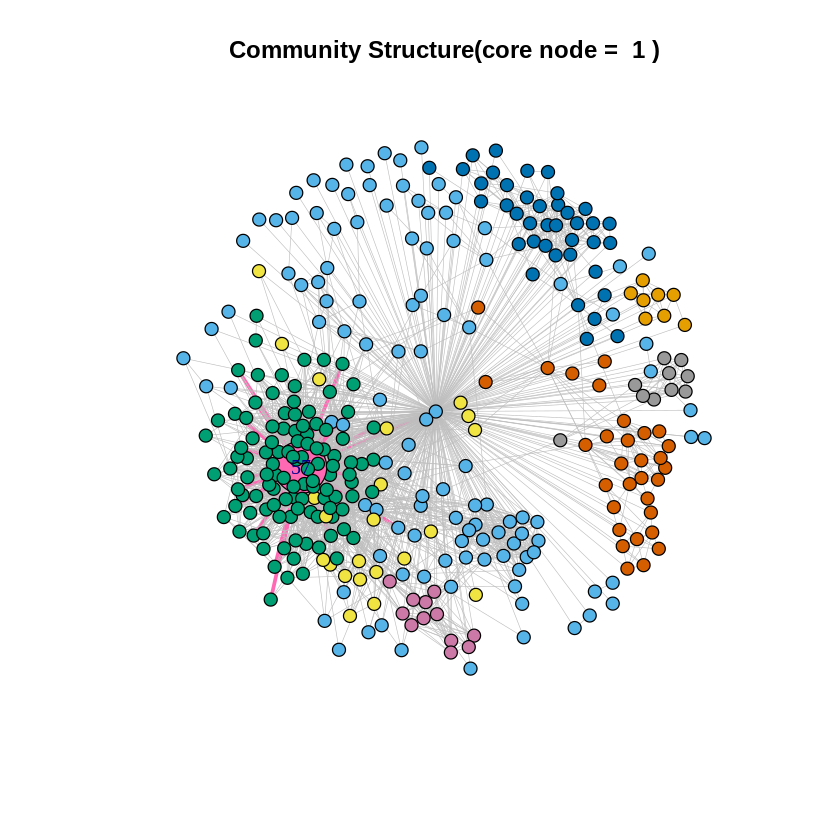

Maximum dispersion of core node: 349 is ID: 377 


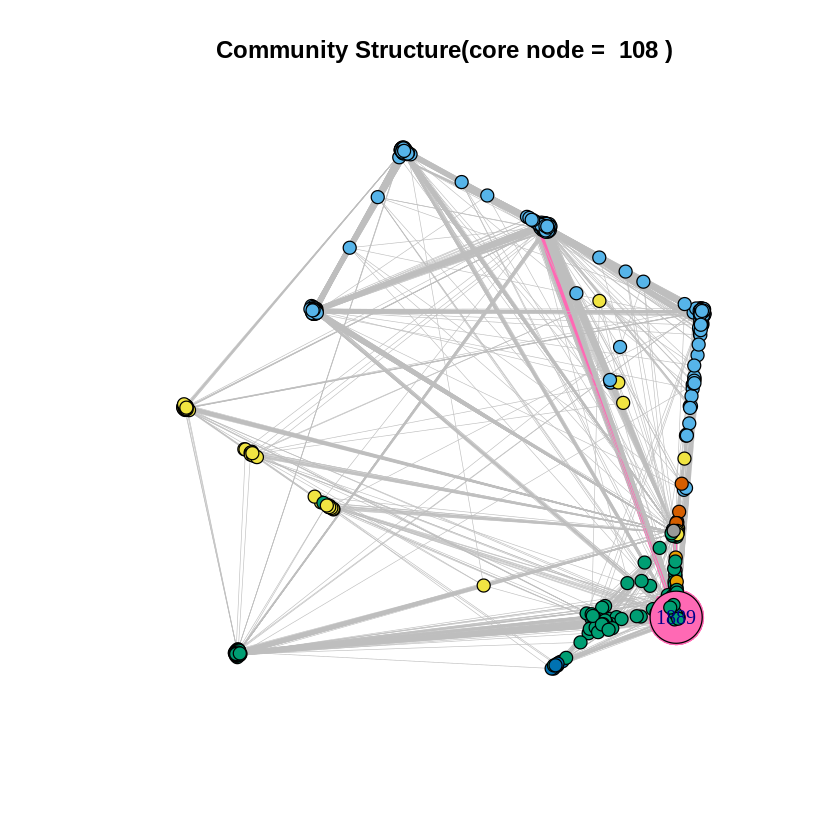

Maximum dispersion of core node: 484 is ID: 108 


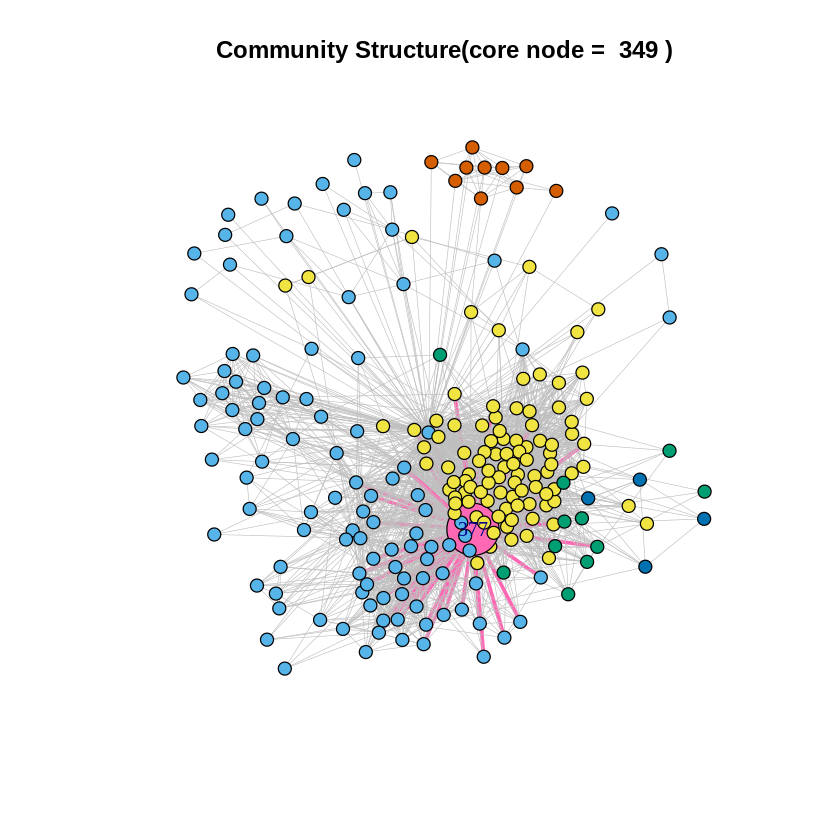

Maximum dispersion of core node: 1087 is ID: 108 


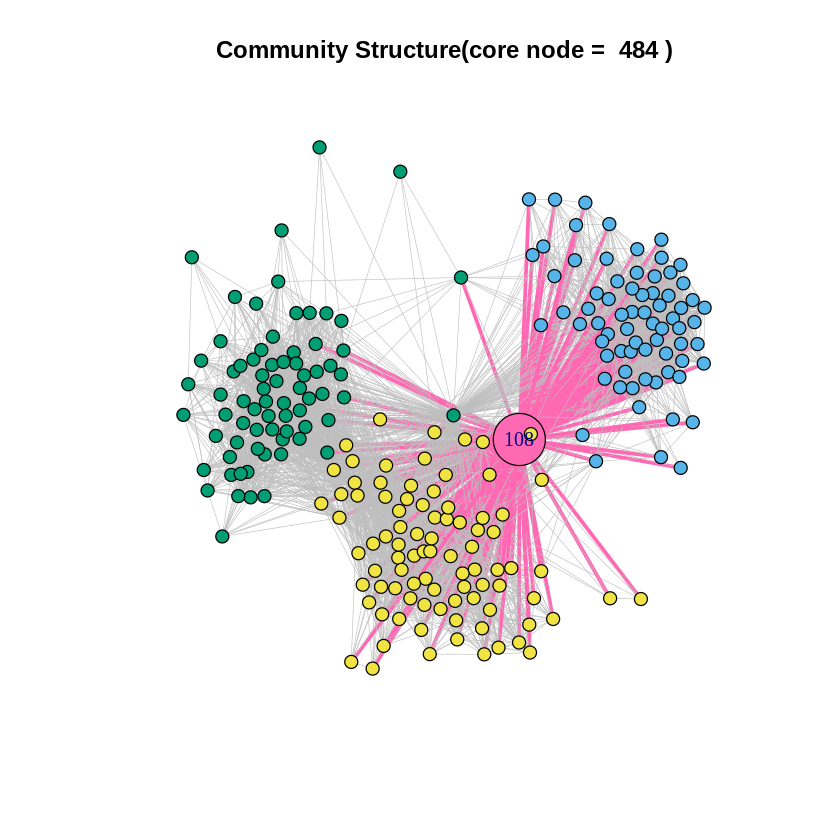

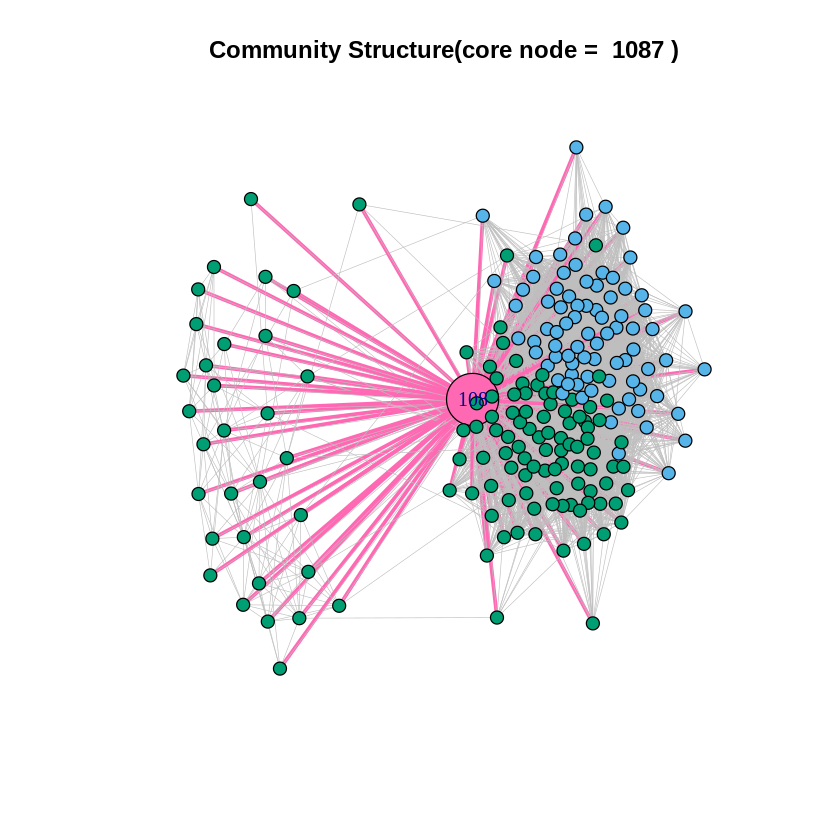

In [0]:
core_node_list <- c(1,108,349,484,1087)

for(core in core_node_list){
    v <- neighbors(G, core)
    personalized <- induced_subgraph(G, c(v, V(G)[core]))
    dis <- seq_len(0)
    names <- seq_len(0)
    for(node in V(personalized)){
        if(V(personalized)[node]$name != core){
            dispersions <- dispersion(personalized, which(V(personalized)$name == core), V(personalized)[node])
            dis <- c(dis, dispersions)
            names <- c(names, V(personalized)[node]$name)
        }
    }
    max_dispersion = which.max(dis)
    max_node = names[max_dispersion]
    community <- fastgreedy.community(personalized)
    node_color <- community$membership + 1
    node_size <- rep(5,length(node_color))
    node_label <- rep(NA, length(V(personalized)))
    edge_weight <- rep(0.5, length(E(personalized)))
    edge_color <- rep("gray", length(E(personalized)))
    edge_color[which(get.edgelist(personalized, name = TRUE)[,1] == max_node | 
                     get.edgelist(personalized, name = TRUE)[,2] == max_node)] <- "hotpink";
    edge_weight[which(get.edgelist(personalized, name = TRUE)[,1] == max_node |  
                      get.edgelist(personalized, name = TRUE)[,2] == max_node)] <- 3;
    node_color[which(V(personalized)$name == max_node)] <- "hotpink";
    node_size[which(V(personalized)$name == max_node)] <- 20;
    node_label[which(V(personalized)$name == max_node)] <- max_node;
    cat(paste("Maximum dispersion of core node:",core, "is ID:", max_node,"\n"))
    plot(personalized, vertex.size = node_size, edge.width = edge_weight, edge.color = edge_color, 
         vertex.color = node_color, vertex.label=node_label, main = paste("Community Structure(core node = ",core,")"))
}

# Question 14

Maximum embeddenss of core node: 1 is ID: 57 
Maximum dispersion/embeddenss of core node: 1 is ID: 323 
Maximum embeddenss of core node: 108 is ID: 1889 
Maximum dispersion/embeddenss of core node: 108 is ID: 1889 


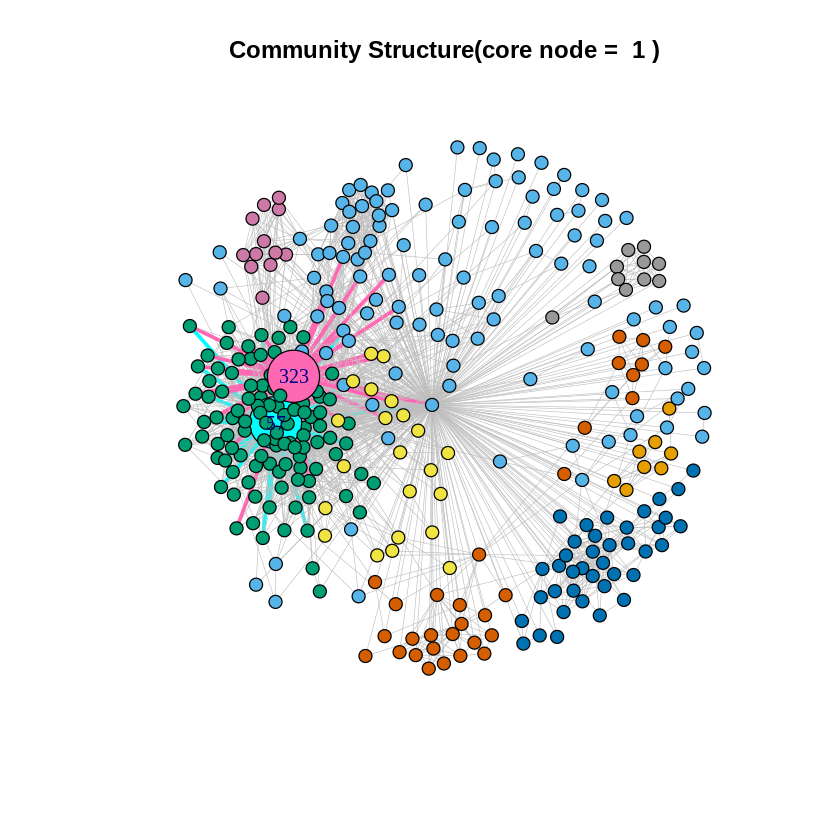

Maximum embeddenss of core node: 349 is ID: 377 
Maximum dispersion/embeddenss of core node: 349 is ID: 377 


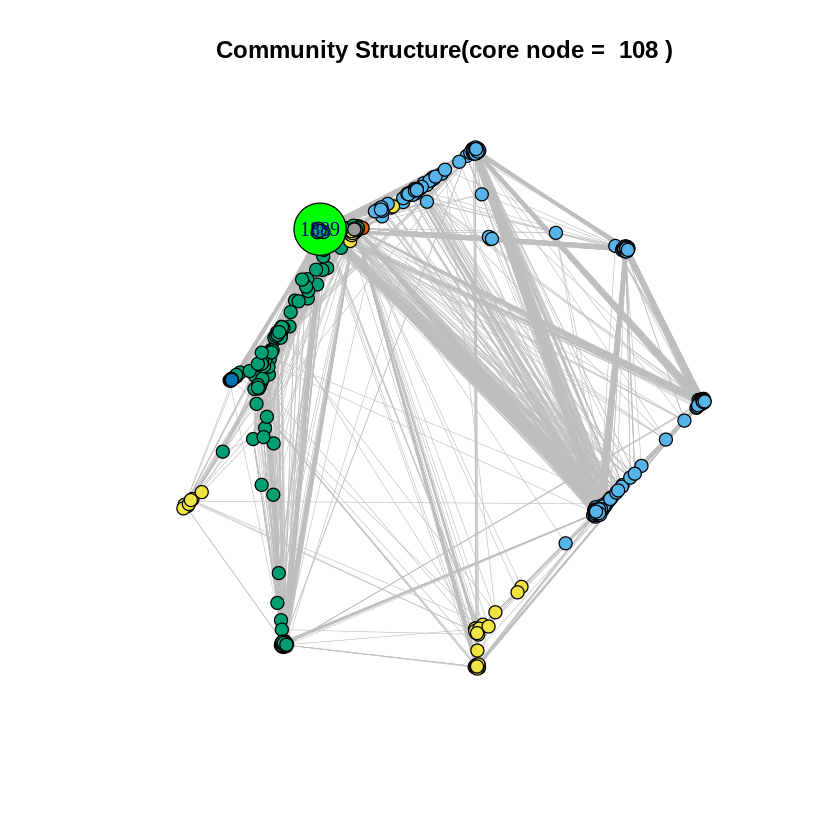

Maximum embeddenss of core node: 484 is ID: 108 
Maximum dispersion/embeddenss of core node: 484 is ID: 108 


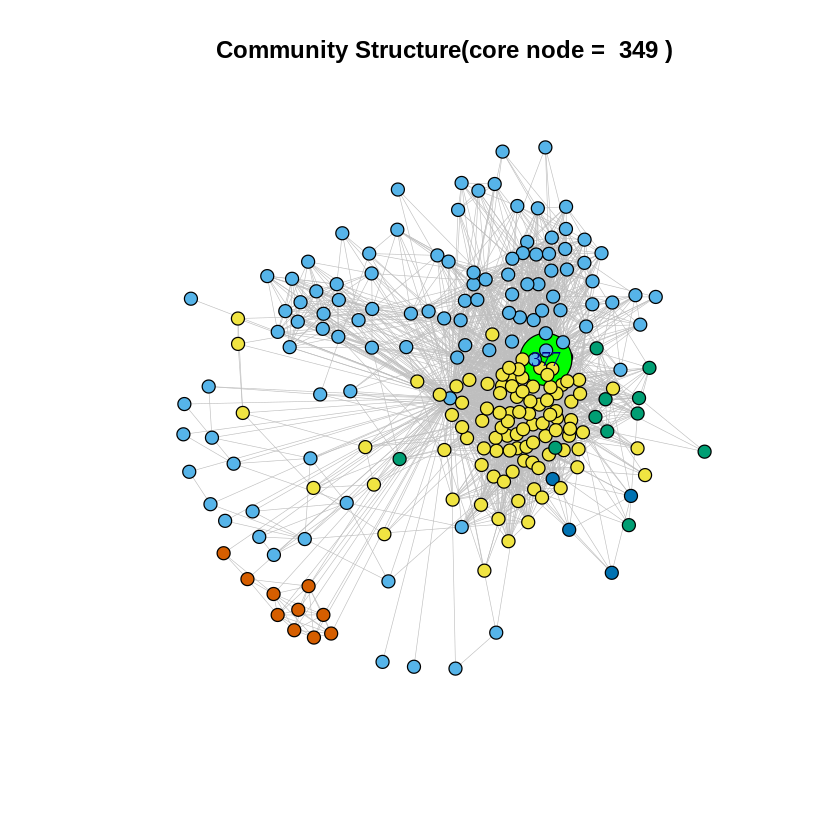

Maximum embeddenss of core node: 1087 is ID: 108 
Maximum dispersion/embeddenss of core node: 1087 is ID: 108 


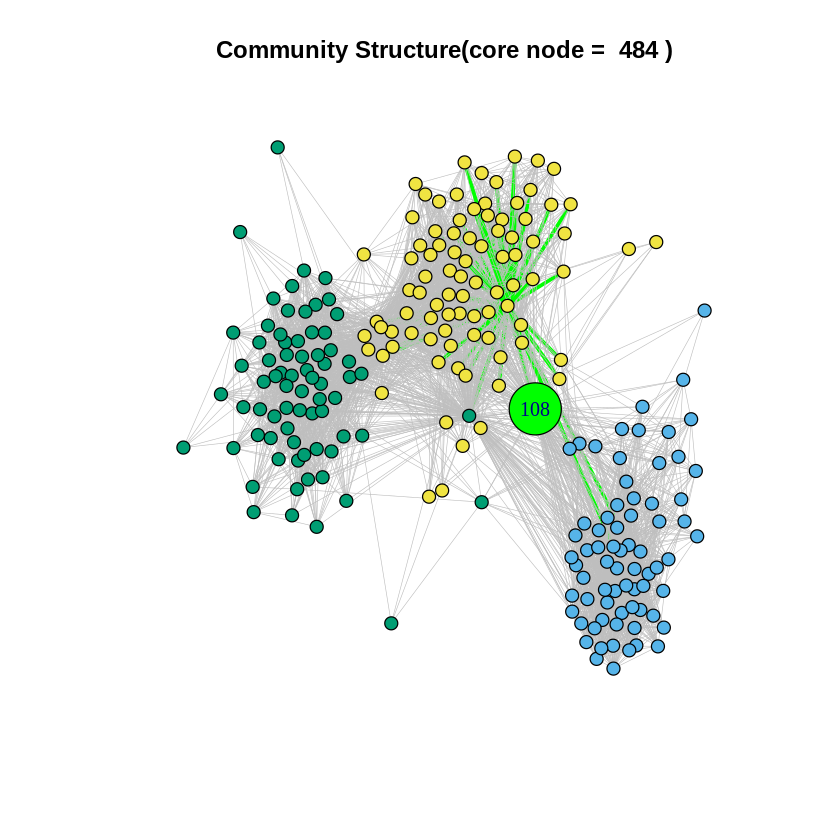

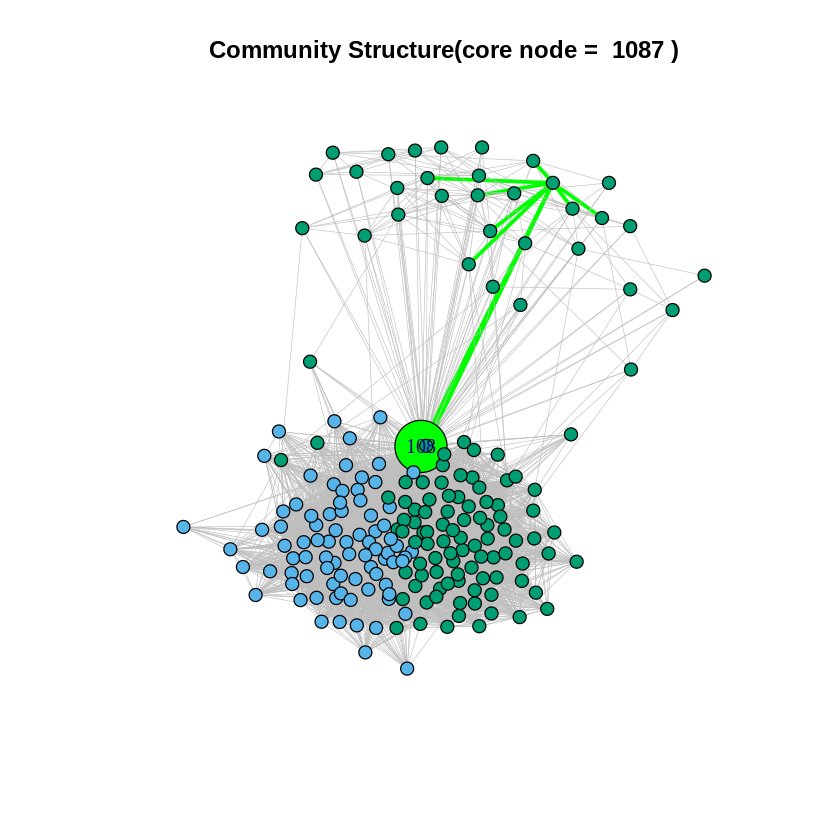

In [0]:
for(core in core_node_list){
    v <- neighbors(G, core)
    personalized <- induced_subgraph(G, c(v, V(G)[core]))
    dis <- seq_len(0)
    emb <- seq_len(0)
    names <- seq_len(0)
    for(node in V(personalized)){
        if(V(personalized)[node]$name != core){
            dispersions <- dispersion(personalized, which(V(personalized)$name == core), V(personalized)[node])
            embedded <- degree(personalized, v = V(personalized)[node]) - 1
            emb <- c(emb, embedded)
            dis <- c(dis, dispersions)
            names <- c(names, V(personalized)[node]$name)
        }
    }
    portion <- dis/ emb
    max_embeddenss <- which.max(emb)
    max_portion <- which.max(portion)
    personal_community <- fastgreedy.community(personalized)
    max_emb_node <- names[max_embeddenss]
    max_portion_node <- names[max_portion]
    community <- fastgreedy.community(personalized)
    cat(paste("Maximum embeddenss of core node:",core, "is ID:", max_emb_node,"\n"))
    cat(paste("Maximum dispersion/embeddenss of core node:",core, "is ID:", max_portion_node,"\n"))
    node_color <- community$membership + 1
    node_size <- rep(5,length(node_color))
    node_label <- rep(NA, length(V(personalized)))
    node_label[which(V(personalized)$name == max_emb_node)] <- max_emb_node;
    node_label[which(V(personalized)$name == max_portion_node)] <- max_portion_node;
    edge_weight <- rep(0.5, length(E(personalized)))
    edge_color <- rep("gray", length(E(personalized)))
    if (max_emb_node == max_portion_node){
      edge_color[which(get.edgelist(personalized, name = FALSE)[,1] == max_emb_node | 
                       get.edgelist(personalized, name = FALSE)[,2] == max_emb_node)] <- "green";
      node_color[which(V(personalized)$name == max_emb_node)] <- "green";               
    }else{
    edge_color[which(get.edgelist(personalized, name = FALSE)[,1] == max_emb_node | 
                     get.edgelist(personalized, name = FALSE)[,2] == max_emb_node)] <- "cyan";
    edge_color[which(get.edgelist(personalized, name = FALSE)[,1] == max_portion_node | 
                     get.edgelist(personalized, name = FALSE)[,2] == max_portion_node)] <- "hotpink";
    node_color[which(V(personalized)$name == max_portion_node)] <- "hotpink";
    node_color[which(V(personalized)$name == max_emb_node)] <- "cyan";
    }
    edge_weight[which(get.edgelist(personalized, name = FALSE)[,1] == max_emb_node |  
                      get.edgelist(personalized, name = FALSE)[,2] == max_emb_node |
                      get.edgelist(personalized, name = FALSE)[,1] == max_portion_node|
                      get.edgelist(personalized, name = FALSE)[,2] == max_portion_node)] <- 3;
    node_size[which(V(personalized)$name == max_emb_node|
                   V(personalized)$name == max_portion_node)] <- 20;
    plot(personalized, vertex.size = node_size, vertex.label = node_label,edge.width = edge_weight, 
         edge.color = edge_color, vertex.color = node_color, 
         main = paste("Community Structure(core node = ",core,")"))
}

# Question 15

# Question 16

Having defined the friend recommendation procedure, we can now apply it to the personalized network of node ID 415. Before we apply the algorithm, we need to create the list of users who we want to recommend new friends to. We create this list by picking all nodes with degree 24. We will denote this list as Nr.

In [0]:
personalized_415 <- make_ego_graph(G, nodes=c(415))
all_list <- degree(personalized_415[[1]])
Nr <- which(all_list == 24)
print(length(Nr))

[1] 11


# Question 17

### 1) Common Neighbors measure

In [0]:
common_results <- c()
for(i in Nr){
  common_accuracy <- c()
  for (step in c(1:10)){
    temp <- personalized_415[[1]]
    R_set <- c()
    neighbors_i <- neighbors(temp, i)
    for (j in neighbors_i){
      if (runif(1, 0, 1) <= 0.25){
        temp <- delete_edges(temp, edge(j, i)) 
        R_set <- c(R_set, j)
      }
    }
    new_neighbors_i <- setdiff(neighbors_i, R_set)
    new_neighbors_i <- c(new_neighbors_i, i)
    not_neighbors_i <- setdiff(V(temp), new_neighbors_i)
    count <- c()
    for (k in not_neighborvs_i){
      neighbors_k <- neighbors(temp, k)
      common_neighbors <- intersect(new_neighbors_i, neighbors_k)
      count <- c(count, length(common_neighbors))
    }
    index <- sort(count,decreasing=TRUE, index.return=TRUE)$ix
    P_set <- not_neighbors_i[index[1:length(R_set)]]
    intersect_set <- intersect(R_set, P_set)
    common_accuracy <- c(common_accuracy, length(intersect_set)/length(R_set))
  }
  common_results <- append(common_results,mean(common_accuracy))
}

print(paste('the average accuracy of common neighbors is:',mean(common_results)))

[1] "the average accuracy of common neighbors is: 0.846439393939394"


### 2) Jaccard measure

In [0]:
jaccard_results <- c()
for(i in Nr){
  jaccard_accuracy <- c()
  for (step in c(1:10)){
    temp <- personalized_415[[1]]
    R_set <- c()
    neighbors_i <- neighbors(temp, i)
    for (j in neighbors_i){
      if (runif(1, 0, 1) <= 0.25){
        temp <- delete_edges(temp, edge(j, i)) 
        R_set <- c(R_set, j)
      }
    }
    new_neighbors_i <- setdiff(neighbors_i, R_set)
    new_neighbors_i <- c(new_neighbors_i, i)
    not_neighbors_i <- setdiff(V(temp), new_neighbors_i)
    count <- c()
    for (k in not_neighbors_i){
      neighbors_k <- neighbors(temp, k)
      common_neighbors <- intersect(new_neighbors_i, neighbors_k)
      union_common_neighbors <- union(new_neighbors_i, neighbors_k)
      count <- c(count, length(common_neighbors)/length(union_common_neighbors))
    }
    index <- sort(count,decreasing=TRUE, index.return=TRUE)$ix
    P_set <- not_neighbors_i[index[1:length(R_set)]]
    intersect_set <- intersect(R_set, P_set)
    jaccard_accuracy <- c(jaccard_accuracy, length(intersect_set)/length(R_set))
  }
  jaccard_results <- append(jaccard_results,mean(jaccard_accuracy))
}

print(paste('the average accuracy of Jaccard is:',mean(jaccard_results)))

[1] "the average accuracy of Jaccard is: 0.83270202020202"


### 3) Adamic Adar measure

In [0]:
adamic_adar_results <- c()
for(i in Nr){
  adamic_adar_accuracy <- c()
  for (step in c(1:10)){
    temp <- personalized_415[[1]]
    R_set <- c()
    neighbors_i <- neighbors(temp, i)
    for (j in neighbors_i){
      if (runif(1, 0, 1) <= 0.25){
        temp <- delete_edges(temp, edge(j, i)) 
        R_set <- c(R_set, j)
      }
    }
    new_neighbors_i <- setdiff(neighbors_i, R_set)
    new_neighbors_i <- c(new_neighbors_i, i)
    not_neighbors_i <- setdiff(V(temp), new_neighbors_i)
    count <- c()
    for (k in not_neighbors_i){
      neighbors_k <- neighbors(temp, k)
      common_neighbors <- intersect(new_neighbors_i, neighbors_k)
      count_1 <- 0
      for (n in common_neighbors){
            size <- length(neighbors(temp, n))
            count_1 <- count_1 + 1/log2(size)
        }
      count <- c(count, count_1)
    }
    index <- sort(count,decreasing=TRUE, index.return=TRUE)$ix
    P_set <- not_neighbors_i[index[1:length(R_set)]]
    intersect_set <- intersect(R_set, P_set)
    adamic_adar_accuracy <- c(adamic_adar_accuracy, length(intersect_set)/length(R_set))
  }
  adamic_adar_results <- append(adamic_adar_results,mean(adamic_adar_accuracy))
}

print(paste('the average accuracy of Adamic Adar is:',mean(adamic_adar_results)))

[1] "the average accuracy of Adamic Adar is: 0.8527886002886"


In [0]:
# Helper Functions

add_ego_node = function(graph,name) {
    # Add the new node
    graph = add.vertices(graph,1,name=name)
    
    new_edge_list = rep(0, 2*vcount(graph))
    for (i in 1:length(new_edge_list)) {
        if (i %% 2 == 0) {
            new_edge_list[i] = i/2
        }
        else {
            new_edge_list[i] = vcount(graph)
        }
    }
    
    # Add the edges
    graph = add_edges(graph, new_edge_list)
    
    return(graph)
}

get_entropy = function(count_vector, N) {
    entropy = 0
    for (i in 1:length(count_vector)) {
        if (count_vector[i] != 0) {
            entropy = entropy + -(count_vector[i]/N)*log2(count_vector[i]/N)
        }
    }
    return(entropy)
}

#Part 2

In [0]:
temp <- tempfile()
download.file('http://snap.stanford.edu/data/gplus.tar.gz',temp)


In [0]:
gunzip(temp, "gplus.tar.gz")

In [0]:
data = read.delim("temp/100129275726588145876.circles",sep="\n",header=FALSE)

In [0]:
GPLUS_PATH <- tempfile()
system("gdown --id 1kFWKicNV2VhovJ4g_fdoFYy3Sbaj3g4A")

In [0]:
data = read.delim("100129275726588145876.circles",sep="\n",header=FALSE)

In [0]:
GPLUS_PATH

[1] "/tmp/RtmpCajOtc/file8b18de6764"

In [0]:
# Helper Functions

add_ego_node = function(graph,name) {
    # Add the new node
    graph = add.vertices(graph,1,name=name)
    
    new_edge_list = rep(0, 2*vcount(graph))
    for (i in 1:length(new_edge_list)) {
        if (i %% 2 == 0) {
            new_edge_list[i] = i/2
        }
        else {
            new_edge_list[i] = vcount(graph)
        }
    }
    
    # Add the edges
    graph = add_edges(graph, new_edge_list)
    
    return(graph)
}

get_entropy = function(count_vector, N) {
    entropy = 0
    for (i in 1:length(count_vector)) {
        if (count_vector[i] != 0) {
            entropy = entropy + -(count_vector[i]/N)*log2(count_vector[i]/N)
        }
    }
    return(entropy)
}

In [0]:
file_list

character(0)

In [0]:
file_list = list.files(GPLUS_PATH)

graph_count = 0
over_two_circles_count = 0
# Read in files from gplu
for (i in 1:length(file_list_1)) {
    filename = paste(GPLUS_PATH, file_list[i], sep="")
    file_type = unlist(strsplit(filename,'\\.'))[2]
    if (file_type == "edges") {
        graph_count = graph_count + 1
    }
    else if (file_type == "circles") {
        circle_data = try(read.delim(filename,sep="\n",header=FALSE))
        if (!inherits(circle_data,'try-error')) circle_data
        if (length(unlist(circle_data)) > 2) {
            over_two_circles_count = over_two_circles_count + 1
        }
    }
}
print(paste("Total Number of Personalized Networks:",graph_count))
print(paste("Number of Personzlied Networks for Users With More Than 2 Circles:",over_two_circles_count))

ERROR: ignored